In [11]:
from opensees.render import mpl as render
from opensees.section import *
import numpy as np

In [172]:
def RegularPolygon(Rcol, n):
    phi =  2*pi/n
    R = Rcol/cos(phi/2)
    for i in range(n):
        vertices.extend([
            [R*cos(i*phi-phi/2),  R*sin(i*phi-phi/2)]
        ])
    poly = patch._Polygon(vertices)
    return poly

def PolygonRing(extRad, intRad, n):
    psi = 2*pi/n
    phi = psi
    collection = []
    cover_divs = 1,2      # divisions in each slice of the cover
    iR1, iR2 = [intRad/cos(pi/n)]*2
    oR1, oR2 = [extRad/cos(pi/n)]*2
    j = 0
    for i in range(n):
        startAngle =  (i - 1/2)*psi
        # j += 1
        sita1  =  startAngle + j*phi   # Slice start angle
        sita2  =  sita1 + phi          # Slice end angle
        # Cover Patch connects the circular core to the polygonal cover
        collection.append(
          patch.quad(None, cover_divs,
            vertices = [
              [   iR1*cos(sita1),    iR1*sin(sita1)],
              [   oR1*cos(sita1),    oR1*sin(sita1)],
              [   oR2*cos(sita2),    oR2*sin(sita2)],
              [   iR2*cos(sita2),    iR2*sin(sita2)],
            ]
        ))
    sect = FiberSection(areas=collection)
    sect.extRad = extRad
    sect.intRad = intRad
    return sect
    
def ConfiningPolygon(extRad, intRad, n, s=1):
    psi = 2*pi/n
    phi = psi/s
    collection = []
    cover_divs = 1,2      # divisions in each slice of the cover
    # iR1    =  intRad/cos(pi/n)
    # iR2    =  intRad/cos(pi/n)
    iR1, iR2 = [intRad]*2

    for i in range(n):
        startAngle =  (i - 1/2)*psi
        for j in range(s):
            # j += 1
            sita1  =  startAngle + j*phi   # Slice start angle
            sita2  =  sita1 + phi          # Slice end angle
            oR1    =  extRad/cos(pi/n -  j*phi)
            oR2    =  extRad/cos(pi/n - (j+1)*phi)
            # iR1    =  intRad/cos(pi/n -  j*phi)
            # iR2    =  intRad/cos(pi/n - (j+1)*phi)
            # Cover Patch connects the circular core to the polygonal cover
            collection.append(
              patch.quad(None, cover_divs,
                vertices = [
                  [   iR1*cos(sita1),    iR1*sin(sita1)],
                  [   oR1*cos(sita1),    oR1*sin(sita1)],
                  [   oR2*cos(sita2),    oR2*sin(sita2)],
                  [   iR2*cos(sita2),    iR2*sin(sita2)],
                ]
            ))
    sect = FiberSection(areas=collection)
    sect.extRad = extRad
    sect.intRad = intRad
    return sect

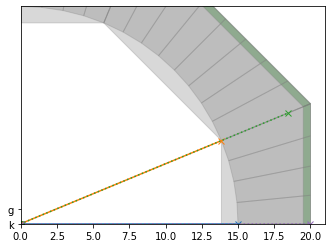

In [173]:
n = 8
extRad,intRad = 20,15
ax = render.section(_oct_ring(extRad, intRad, n))
render.section(PolygonRing(extRad, extRad-0.5, n), ax = ax, facecolor="g")
# render.section(_oct_ring(extRad-0.010, extRad, n, 1), ax = ax, facecolor="g")
# render.section(_oct_ring(extRad, extRad-0.50, n, 1), ax = ax, facecolor="r")
# render.section(_oct_ring(extRad, extRad-0.500, n, 2), ax = ax, facecolor="b")
# render.section(_oct_ring(extRad, extRad-0.050, n, 3), ax = ax, facecolor="r")
# render.section(_oct_ring(extRad, extRad-0.001, n, 3), ax = ax, facecolor="b")
render.section(_oct_ring(extRad, intRad, n, 8), ax = ax)

ax.plot([0, intRad], [0, 0], "-x")
ax.plot([0, intRad*np.cos(np.pi/8)],[0, intRad*np.sin(np.pi/8)],"-x")
ax.plot([0,(extRad-0.05)*np.cos(np.pi/8)],[0,(extRad-0.05)*np.sin(np.pi/8)],":x","k")
ax.plot([0,(extRad-0.05)*np.cos(0)],[0,(extRad-0.05)*np.sin(0)],":x","g")

ax.set_xlim([ 0, extRad+1])
ax.set_ylim([ 0,  15]);
ax.axis("on");

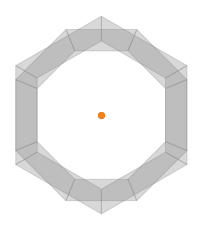

In [174]:
ax = render.section(PolygonRing(extRad, intRad, 8))
ax = render.section(PolygonRing(extRad, intRad, 6), ax=ax)